In [85]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import pandas as pd
import numpy as np
import matplotlib.ticker as ticker
from sklearn import preprocessing
%matplotlib inline

In [86]:
df=pd.read_csv('churn.csv')

In [87]:
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes
6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.4,No
7,6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.9,No
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,6388-TABGU,Male,0,No,Yes,62,Yes,No,DSL,Yes,...,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


In [88]:
np.where(pd.isnull(df)) #returns the row and column indices where the value is NaN:

(array([], dtype=int64), array([], dtype=int64))

__detecting numbers in string containing column, and changing them to NaN, good for cleaning__

In [89]:
# Detecting numbers 
#cnt=0
#for row in df['gender']:
 #   try:
  #      int(row)
    #    df.loc[cnt, 'gender']=np.nan
    #except ValueError:
     #   pass
    #cnt+=1

__check where Nan values are in three different forms__

In [90]:
#list(map(tuple, np.where(np.isnan(x))))

In [91]:
df.isnull().stack()[lambda x: x].index.tolist()

[]

In [92]:
np.where(pd.isnull(df)) #returns the row and column indices where the value is NaN:

(array([], dtype=int64), array([], dtype=int64))

In [93]:
df.Churn.value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

In [94]:
print ("Rows     : " ,df.shape[0])
print ("Columns  : " ,df.shape[1])
print ("\nFeatures : \n" ,df.columns.tolist())
print ("\nMissing values :  ", df.isnull().sum().values.sum())
print ("\nUnique values :  \n",df.nunique())

Rows     :  7043
Columns  :  21

Features : 
 ['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn']

Missing values :   0

Unique values :  
 customerID          7043
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6531
Churn                  2
dtype: int64


In [95]:
df['TotalCharges'] = df["TotalCharges"].replace(" ",np.nan)
df["TotalCharges"] = df["TotalCharges"].astype(float)

In [96]:
np.where(pd.isnull(df)) #returns the row and column indices where the value is NaN:

(array([ 488,  753,  936, 1082, 1340, 3331, 3826, 4380, 5218, 6670, 6754]),
 array([19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19]))

In [97]:
df = df[df["TotalCharges"].notnull()]
df = df.reset_index()[df.columns]

In [98]:
np.where(pd.isnull(df)) #returns the row and column indices where the value is NaN:

(array([], dtype=int64), array([], dtype=int64))

In [99]:
#replace 'No internet service' to No for the following columns
replace_cols = [ 'OnlineSecurity', 'MultipleLines', 'DeviceProtection',
                'TechSupport','StreamingTV', 'StreamingMovies']
for i in replace_cols : 
    df[i]  = df[i].replace({'No internet service' : 'No'})
    df[i]  = df[i].replace({'No phone service' : 'No'})


#Tenure to categorical column
def tenure_lab(df) :
    
    if df["tenure"] <= 12 :
        return "1"
    elif (df["tenure"] > 12) & (df["tenure"] <= 24 ):
        return "2"
    elif (df["tenure"] > 24) & (df["tenure"] <= 48) :
        return "3"
    elif (df["tenure"] > 48) & (df["tenure"] <= 60) :
        return "4"
    elif df["tenure"] > 60 :
        return "5"
df["tenure_group"] = df.apply(lambda df:tenure_lab(df),
                                      axis = 1)

In [100]:
np.where(pd.isnull(df)) #returns the row and column indices where the value is NaN:

(array([], dtype=int64), array([], dtype=int64))

In [102]:
churndf=df[df.Churn=='Yes']
nochurndf=df[df.Churn=='No']

In [103]:
churndf

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_group
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,...,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.50,Yes,1
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes,3
13,0280-XJGEX,Male,0,No,No,49,Yes,Yes,Fiber optic,No,...,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.30,Yes,4
18,4190-MFLUW,Female,0,Yes,Yes,10,Yes,No,DSL,No,...,Yes,No,No,Month-to-month,No,Credit card (automatic),55.20,528.35,Yes,1
20,8779-QRDMV,Male,1,No,No,1,No,No,DSL,No,...,No,No,Yes,Month-to-month,Yes,Electronic check,39.65,39.65,Yes,1
22,1066-JKSGK,Male,0,No,No,1,Yes,No,No,No,...,No,No,No,Month-to-month,No,Mailed check,20.15,20.15,Yes,1
26,6467-CHFZW,Male,0,Yes,Yes,47,Yes,Yes,Fiber optic,No,...,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.35,4749.15,Yes,3
27,8665-UTDHZ,Male,0,Yes,Yes,1,No,No,DSL,No,...,No,No,No,Month-to-month,No,Electronic check,30.20,30.20,Yes,1


In [104]:
from matplotlib.gridspec import GridSpec
def plotpiesbychurn(column):
        plt.figure(1, figsize=(20,10))
        the_grid = GridSpec(2, 2)
        valch = churndf[column].value_counts().values.tolist()
        labelsch  = churndf[column].value_counts().keys().tolist()
        plt.subplot(the_grid[0, 0], aspect=1)
        plt.pie(valch, labels=labelsch, autopct='%1.1f%%',
        shadow=True, startangle=90)
        plt.title("Churned")
        plt.suptitle(column + " distribution in customer churn ",y=1)
        valnch = nochurndf[column].value_counts().values.tolist()
        labelsnch  = nochurndf[column].value_counts().keys().tolist()
        plt.subplot(the_grid[0, 1], aspect=1)
        plt.pie(valnch, labels=labelsnch, autopct='%1.1f%%',
        shadow=True, startangle=90)
        plt.title("Didn't Churn")


        return plt.show()




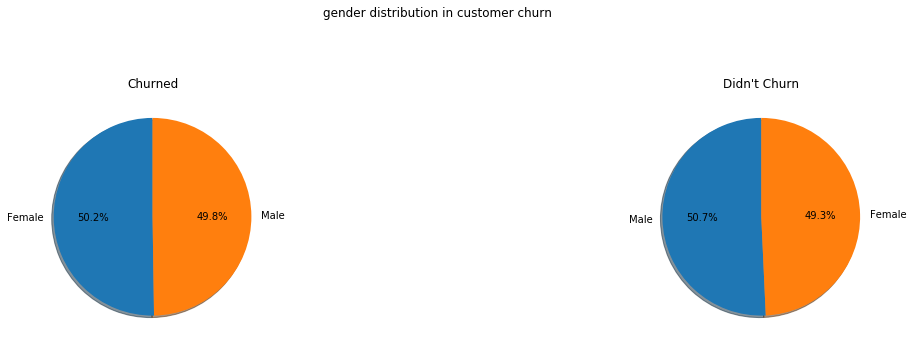

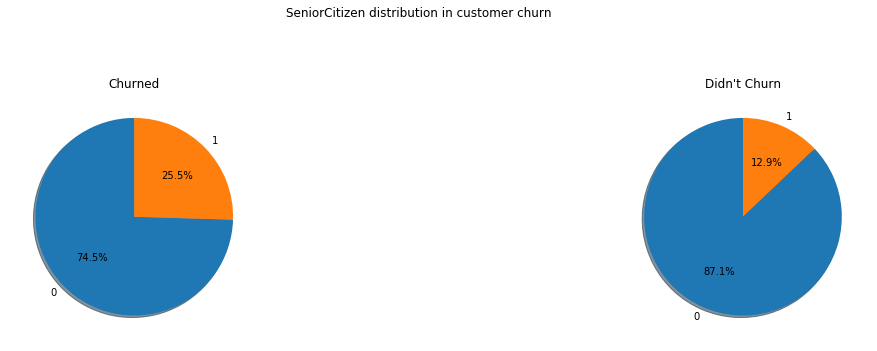

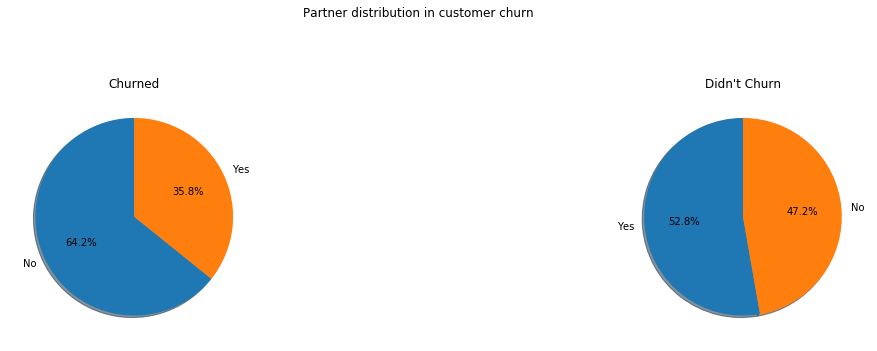

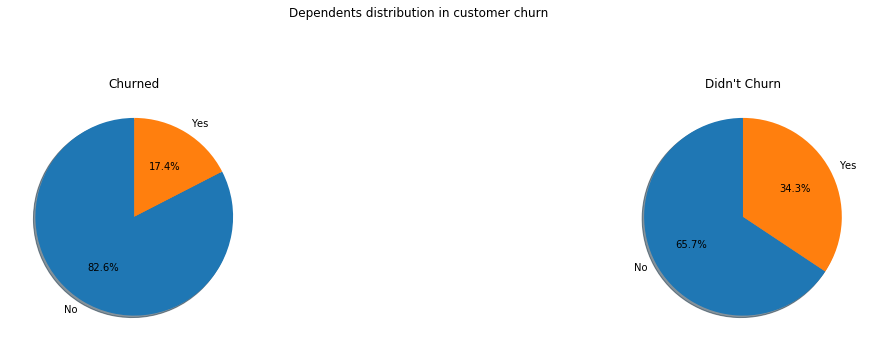

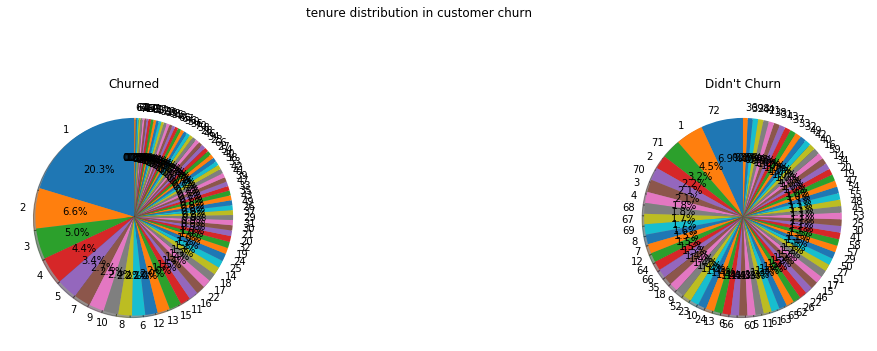

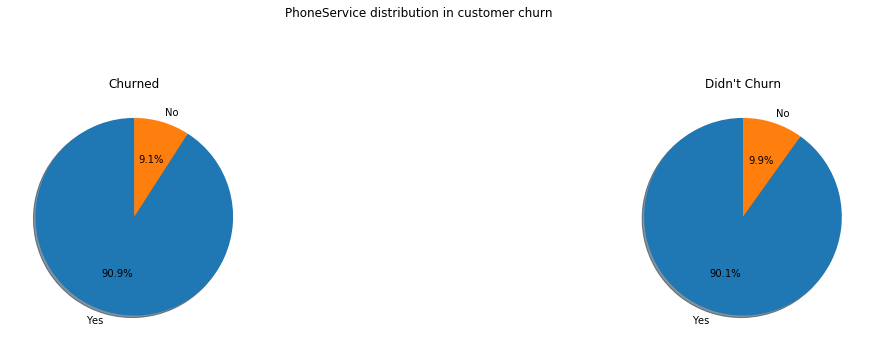

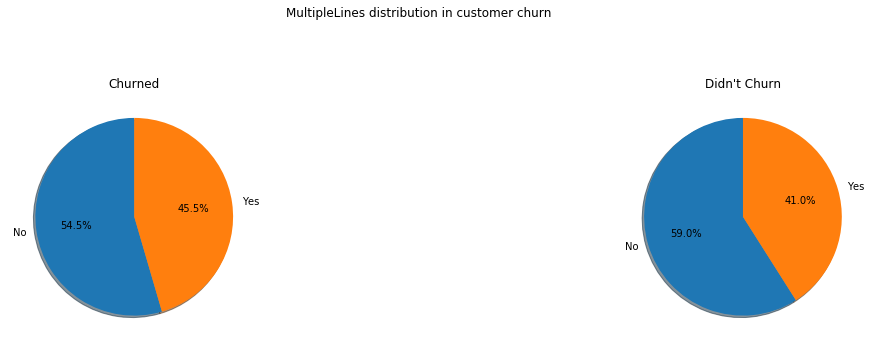

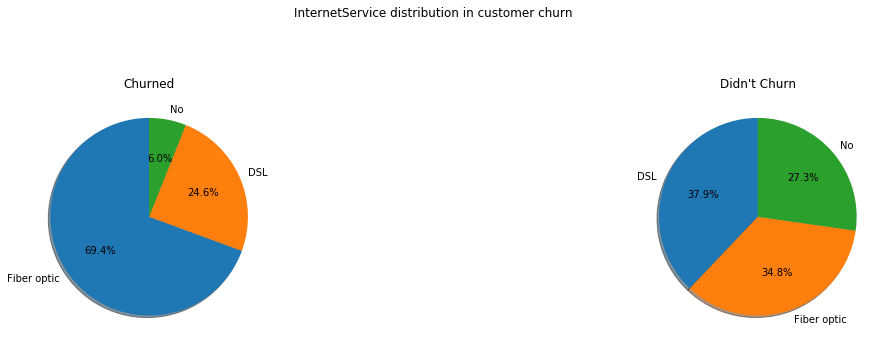

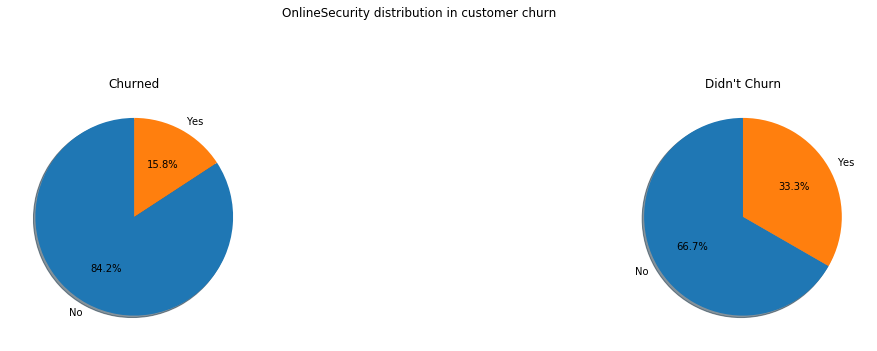

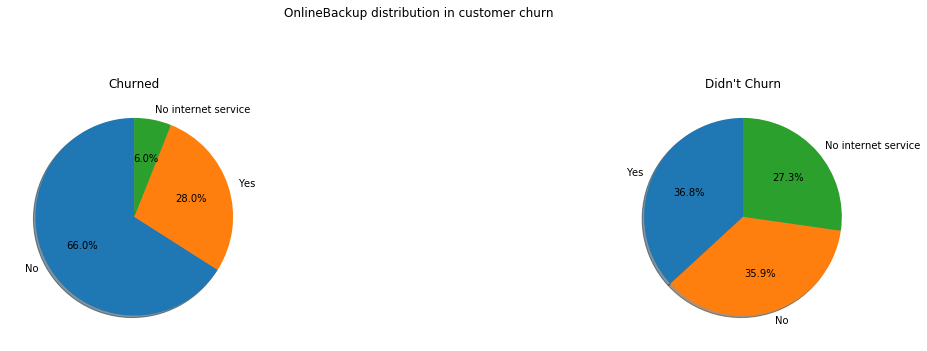

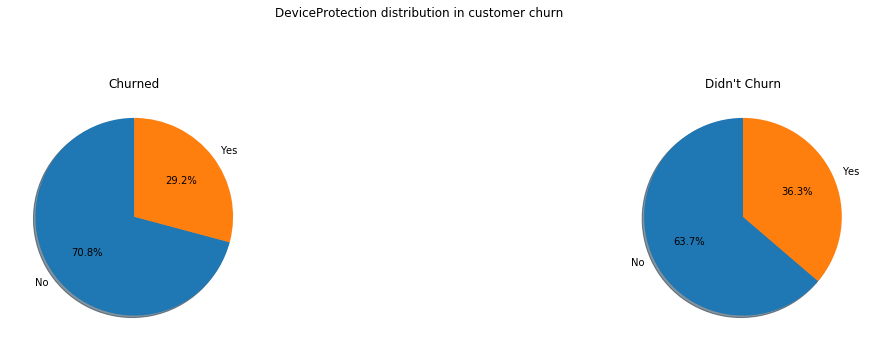

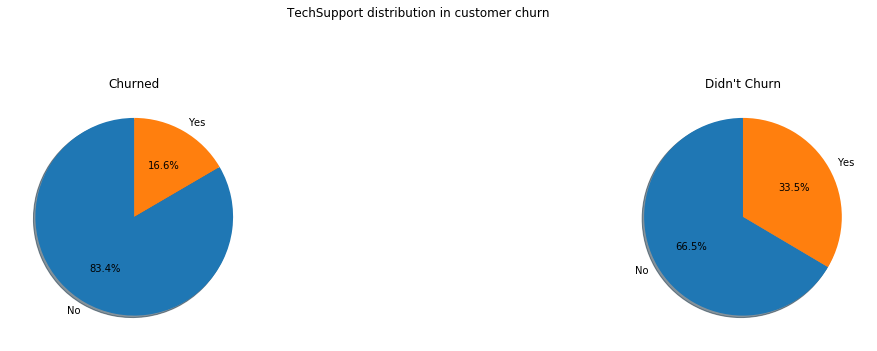

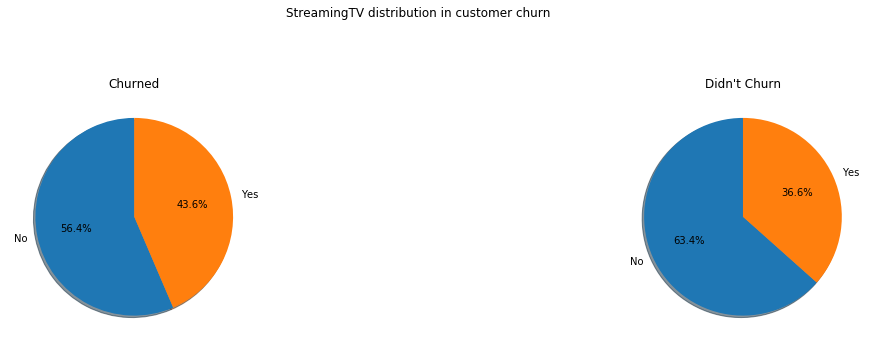

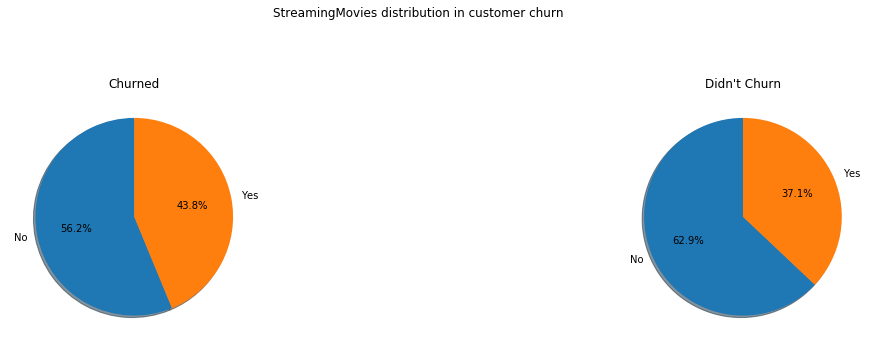

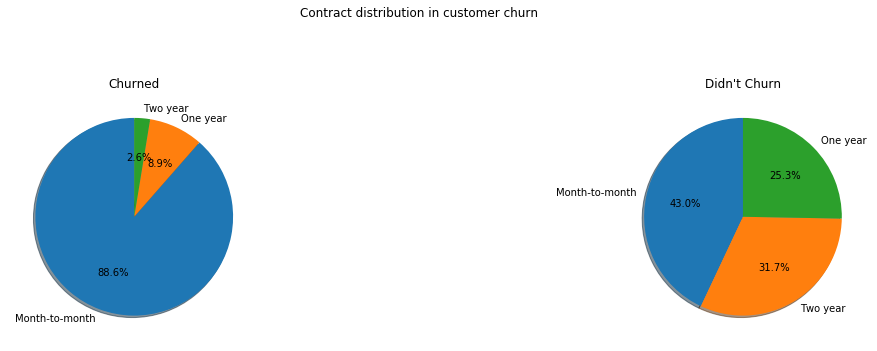

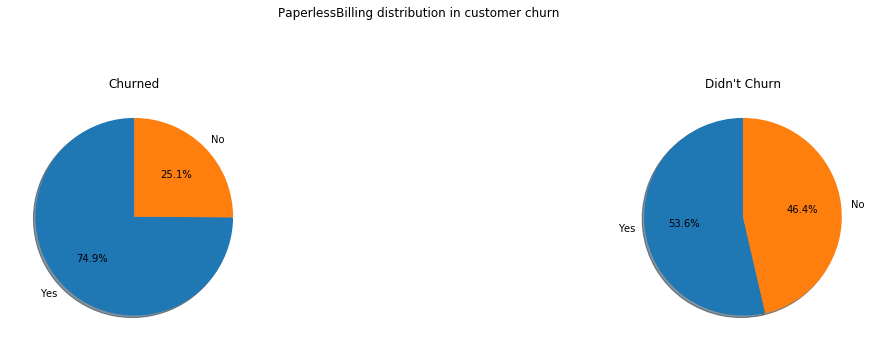

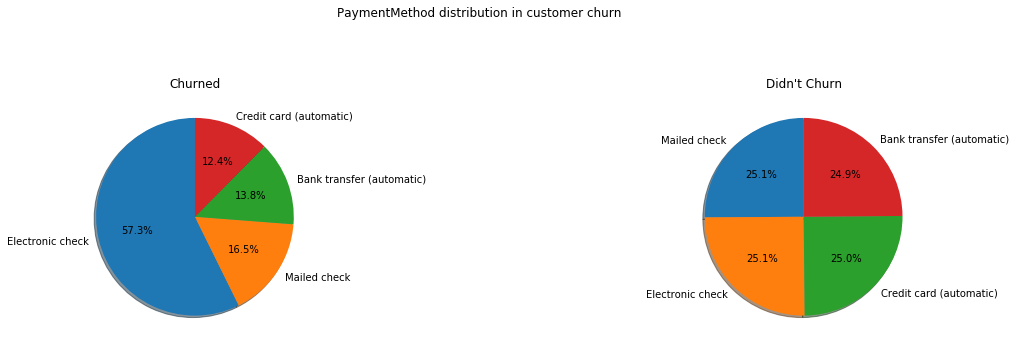

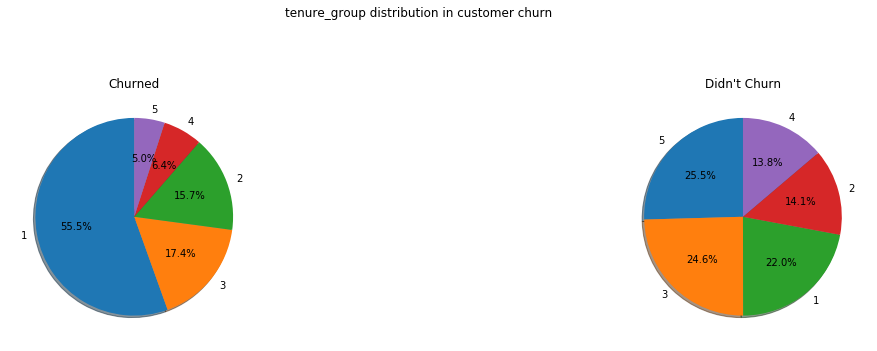

In [105]:
for column in df.columns:
    if ((column !='customerID') & (column !='Churn') & (column !='MonthlyCharges') & (column !='TotalCharges')):   
        plotpiesbychurn(column)

In [107]:
#changes genders to binary with male=1 and famale=0
cnt=0
for row in df['gender']:
    if (df.loc[cnt, 'gender']=="Male"):
         df.loc[cnt, 'gender']=1
    else:
        df.loc[cnt, 'gender']=0
    cnt+=1
#changes SeniorCitizen to binary with yes=1 and no=0

#changes Partner to binary with yes=1 and no=0
cnt=0
for row in df['Partner']:
    if (df.loc[cnt, 'Partner']=="Yes"):
         df.loc[cnt, 'Partner']=1
    else:
        df.loc[cnt, 'Partner']=0
    cnt+=1

#changes PhoneService to binary with yes=1 and no=0
cnt=0
for row in df['PhoneService']:
    if (df.loc[cnt, 'PhoneService']=="Yes"):
         df.loc[cnt, 'PhoneService']=1
    else:
        df.loc[cnt, 'PhoneService']=0
    cnt+=1
#changes Churn to binary with yes=1 and no=0
cnt=0
for row in df['Churn']:
    if (df.loc[cnt, 'Churn']=="Yes"):
         df.loc[cnt, 'Churn']=1
    else:
        df.loc[cnt, 'Churn']=0
    cnt+=1



In [108]:
np.where(pd.isnull(df)) #returns the row and column indices where the value is NaN:

(array([], dtype=int64), array([], dtype=int64))

In [110]:
df["gender"] = df["gender"].astype(float)
df["Partner"] = df["Partner"].astype(float)
df["tenure_group"] = df["tenure_group"].astype(float)
df["PhoneService"] = df["PhoneService"].astype(float)
df["SeniorCitizen"] = df["SeniorCitizen"].astype(float)


np.where(pd.isnull(df)) #returns the row and column indices where the value is NaN:



(array([], dtype=int64), array([], dtype=int64))

In [111]:
x=df[['gender','SeniorCitizen','Partner','tenure_group','PhoneService','MonthlyCharges','TotalCharges']].values

In [112]:
xdf=df[['gender','SeniorCitizen','Partner','tenure_group','PhoneService','MonthlyCharges','TotalCharges','Churn']]

In [113]:
xdf

,gender,SeniorCitizen,Partner,tenure_group,PhoneService,MonthlyCharges,TotalCharges,Churn
0,0.0,0.0,1.0,1.0,0.0,29.85,29.85,0
1,1.0,0.0,0.0,3.0,1.0,56.95,1889.50,0
2,1.0,0.0,0.0,1.0,1.0,53.85,108.15,1
3,1.0,0.0,0.0,3.0,0.0,42.30,1840.75,0
4,0.0,0.0,0.0,1.0,1.0,70.70,151.65,1
5,0.0,0.0,0.0,1.0,1.0,99.65,820.50,1
6,1.0,0.0,0.0,2.0,1.0,89.10,1949.40,0
7,0.0,0.0,0.0,1.0,0.0,29.75,301.90,0
8,0.0,0.0,1.0,3.0,1.0,104.80,3046.05,1
9,1.0,0.0,0.0,5.0,1.0,56.15,3487.95,0


In [114]:
np.where(pd.isnull(xdf)) #returns the row and column indices where the value is NaN:

(array([], dtype=int64), array([], dtype=int64))

In [115]:
np.set_printoptions(suppress=True)
x

array([[   0.  ,    0.  ,    1.  , ...,    0.  ,   29.85,   29.85],
       [   1.  ,    0.  ,    0.  , ...,    1.  ,   56.95, 1889.5 ],
       [   1.  ,    0.  ,    0.  , ...,    1.  ,   53.85,  108.15],
       ...,
       [   0.  ,    0.  ,    1.  , ...,    0.  ,   29.6 ,  346.45],
       [   1.  ,    1.  ,    1.  , ...,    1.  ,   74.4 ,  306.6 ],
       [   1.  ,    0.  ,    0.  , ...,    1.  ,  105.65, 6844.5 ]])

In [116]:
y = df['Churn'].values

In [117]:
y

array([0, 0, 1, ..., 0, 1, 0])

In [118]:
x = preprocessing.StandardScaler().fit(x).transform(x.astype(float))

__when using KNN, all values should be numerical (continous or ordinal) bcoz it has to be numpy array, the process of changing categorical to ordinal is called one hot encoding__

Hot encoding turns a column with n caegories to n columns. Dummy coding just assigns a number to the parameters.

In [119]:
x

array([[-1.00943013, -0.44032709,  1.03561683, ..., -3.05633383,
        -1.16169394, -0.99419409],
       [ 0.99065797, -0.44032709, -0.9656081 , ...,  0.32718939,
        -0.26087792, -0.17373982],
       [ 0.99065797, -0.44032709, -0.9656081 , ...,  0.32718939,
        -0.36392329, -0.95964911],
       ...,
       [-1.00943013, -0.44032709,  1.03561683, ..., -3.05633383,
        -1.17000405, -0.85451414],
       [ 0.99065797,  2.27103902,  1.03561683, ...,  0.32718939,
         0.31916782, -0.87209546],
       [ 0.99065797, -0.44032709, -0.9656081 , ...,  0.32718939,
         1.35793167,  2.01234407]])

In [120]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( x, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (5625, 7) (5625,)
Test set: (1407, 7) (1407,)


In [121]:
from sklearn.neighbors import KNeighborsClassifier

In [122]:
k = 4
#Train Model and Predict  
neigh = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)
neigh

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=4, p=2,
           weights='uniform')

In [123]:
yhat = neigh.predict(X_test)
yhat[0:5]

array([0, 0, 0, 1, 0])

In [124]:
from sklearn import metrics
print("Train set Accuracy: ", metrics.accuracy_score(y_train, neigh.predict(X_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, yhat))

Train set Accuracy:  0.8332444444444445
Test set Accuracy:  0.759772565742715


In [125]:
k = 6
#Train Model and Predict  
neigh = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)
neigh
yhat = neigh.predict(X_test)
yhat[0:5]
from sklearn import metrics
print("Train set Accuracy: ", metrics.accuracy_score(y_train, neigh.predict(X_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, yhat))

Train set Accuracy:  0.8174222222222223
Test set Accuracy:  0.7711442786069652


In [126]:
Ks = 20
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))
ConfustionMx = [];
for n in range(1,Ks):
    
    #Train Model and Predict  
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    yhat=neigh.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)

    
    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])

mean_acc

array([0.71641791, 0.75621891, 0.74626866, 0.75977257, 0.75977257,
       0.77114428, 0.77256574, 0.76687989, 0.77896233, 0.77398721,
       0.77967306, 0.77114428, 0.76403696, 0.76972281, 0.76687989,
       0.77256574, 0.75764037, 0.76901208, 0.76687989])

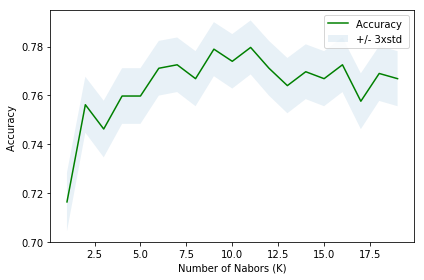

In [127]:
plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.legend(('Accuracy ', '+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Nabors (K)')
plt.tight_layout()
plt.show()

In [128]:
print( "The best accuracy was with", mean_acc.max(), "with k=", mean_acc.argmax()+1) 

The best accuracy was with 0.7796730632551528 with k= 11


__Decision Tree__

In [129]:
from sklearn.model_selection import train_test_split

In [130]:
X_trainset, X_testset, y_trainset, y_testset = train_test_split(x, y, test_size=0.3, random_state=3)

In [131]:
from sklearn.tree import DecisionTreeClassifier
drugTree = DecisionTreeClassifier(criterion="entropy",max_depth=2)
drugTree # it shows the default parameters

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=2,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [132]:
drugTree.fit(X_trainset,y_trainset)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=2,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [133]:
predTree = drugTree.predict(X_testset)

In [134]:
print (predTree [0:5])


[0 0 0 1 0]


In [135]:
print (predTree [0:5])
print (y_testset [0:5])


[0 0 0 1 0]
[0 1 1 1 0]


In [136]:
from sklearn import metrics
import matplotlib.pyplot as plt
print("DecisionTrees's Accuracy: ", metrics.accuracy_score(y_testset, predTree))

DecisionTrees's Accuracy:  0.79478672985782


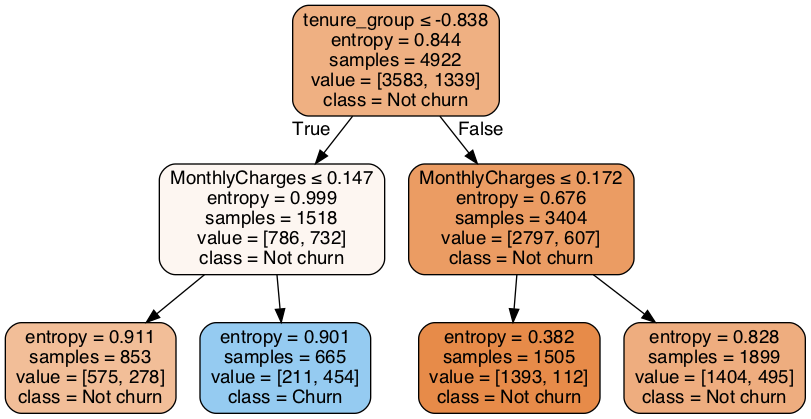

In [139]:
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
columns = xdf.columns[0:7]
dot_data = StringIO()
export_graphviz(drugTree, out_file=dot_data,feature_names = columns, class_names=["Not churn","Churn"], 
                filled=True, rounded=True,
                special_characters=True,rotate=False)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

__Logistic Regression__

In [140]:
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (5625, 7) (5625,)
Test set: (1407, 7) (1407,)


In [141]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
LR = LogisticRegression(C=0.01, solver='liblinear').fit(X_train,y_train)
LR

LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='liblinear',
          tol=0.0001, verbose=0, warm_start=False)

In [142]:
yhat = LR.predict(X_test)
yhat

array([0, 0, 0, ..., 0, 0, 1])

In [143]:
yhat_prob = LR.predict_proba(X_test)
yhat_prob

array([[0.78572655, 0.21427345],
       [0.78284624, 0.21715376],
       [0.86190779, 0.13809221],
       ...,
       [0.95160781, 0.04839219],
       [0.62978067, 0.37021933],
       [0.49328403, 0.50671597]])

In [144]:
from sklearn.metrics import jaccard_similarity_score
jaccard_similarity_score(y_test, yhat)

0.775408670931059

In [145]:
from sklearn.metrics import classification_report, confusion_matrix
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
print(confusion_matrix(y_test, yhat, labels=[1,0]))

[[151 224]
 [ 92 940]]


Confusion matrix, without normalization
[[151 224]
 [ 92 940]]


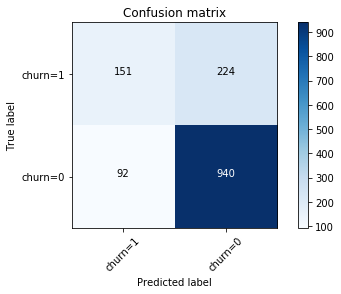

In [146]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, yhat, labels=[1,0])
np.set_printoptions(precision=2)


# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['churn=1','churn=0'],normalize= False,  title='Confusion matrix')